# Szállítási feladatok

1. feladat: Négy hegyi falu vízigényét két víztározóból fedezik. Az egyes falvak vízigényét, a tározók kapacitását és a szállítási költségeket a következő táblázat tartalmazza.
$$
\begin{array}{l|cccc|c}
\text{Költségek} & \text{A falu} & \text{B falu} & \text{C falu} & \text{D falu} & \text{Kapacitás} \\ \hline
\text{I. víztározó} & 27 & 22 & 29 & 32 & 80 \\
\text{II. víztározó} & 28 & 24 & 32 & 20 & 120 \\ \hline
\text{Igény} & 40 & 55 & 70 & 35 & 
\end{array}
$$

a) Adjunk meg egy LP modellt (nem a pulp implementációt), amely meghatározza a falvak vízigényeit minimális szállítási költséggel megvalósító szállítási tervet! Ezt követően adjuk is meg a minimális költségű szállítást (pulp implementáció segítségével)!

*Megoldás:* jelölje $x_{ij}$ változók az $i$-dik víztározóból ($i=1,2$) a $j$ faluba ($j=A,B,C,D$) történő szállítást

$$
\begin{array}{rccc}
\min & 27x_{1A} + 22x_{1B} + 29x_{1C} + 32x_{1D} + 28x_{2A} + 24x_{2B} + 32x_{2C} + 20x_{2D} & & \\
\text{f.h.} & \phantom{27}x_{1A} + \phantom{22}x_{1B} + \phantom{29}x_{1C} + \phantom{32}x_{1D} \phantom{+ 28x_{2A} + 24x_{2B} + 32x_{2C} + 20x_{2D}} & \leq & \phantom{1}80 \\
& \phantom{27x_{1A} + 22x_{1B} + 29x_{1C} + 32x_{1D} +28}x_{2A} + \phantom{24}x_{2B} + \phantom{32}x_{2C} + \phantom{20}x_{2D} & \leq & 120 \\
& \phantom{27}x_{1A} \phantom{+22x_{1B} + 29x_{1C} + 32x_{1D}} + \phantom{28}x_{2A} \phantom{+ 24x_{2B} + 32x_{2C} + 20x_{2D}} & \geq & \phantom{1}40 \\
& \phantom{27x_{1A} +22} x_{1B} \phantom{+29x_{1C} + 32x_{1D} + 28x_{2A}} + \phantom{24}x_{2B} \phantom{+ 32x_{2C} + 20x_{2D}}& \geq & \phantom{1}55 \\
& \phantom{27x_{1A} +22x_{1B}+29}  x_{1C} \phantom{+ 32x_{1D} + 28x_{2A}+24x_{2B}} + \phantom{32}x_{2C} \phantom{+ 20x_{2D}}& \geq & \phantom{1}70 \\
& \phantom{27x_{1A} +22x_{1B}+29x_{1C}+32} x_{1D} \phantom{+ 28x_{2A}+24x_{2B}+ 32x_{2C}} +\phantom{20}x_{2D}& \geq & \phantom{1}35 \\
& \phantom{27}x_{1A}, \phantom{22}x_{1B}, \phantom{29}x_{1C},\phantom{32}x_{1D},\phantom{28}x_{2A}, \phantom{24}x_{2B}, \phantom{32}x_{2C},\phantom{20}x_{2D}& \geq & \phantom{12}0
\end{array}
$$

Kiegyensúlyozott feladat: az össz.kereslet ($40+55+70+35=200$) megegyezik az össz.kínálattal ($80+120=200$).
* Nincs szükség több (fiktív) keresleti vagy kínálati pont bevezetésére
* Minden megengedett megoldásban a keresleti és kínálati pontok egyenlőtlenségei mind egyenlőséggel teljesülnek

{1: Text(0, 0.5, '80'),
 2: Text(0, -1.5, '120'),
 'A': Text(1, 1.25, '-40'),
 'B': Text(1.1, 0, '-55'),
 'C': Text(1.1, -1, '-70'),
 'D': Text(1, -2.25, '-35')}

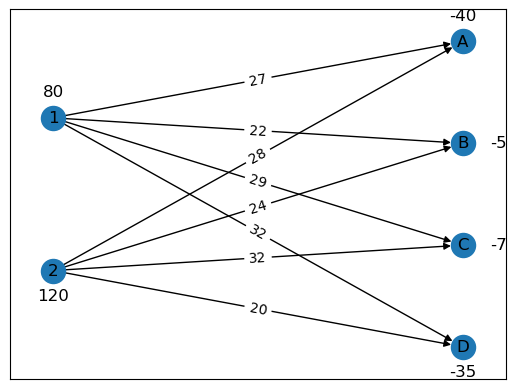

In [1]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from([
    (1, {"supply": 80}),
    (2, {"supply": 120}),
    ('A', {"supply": -40}),
    ('B', {"supply": -55}),
    ('C', {"supply": -70}),
    ('D', {"supply": -35})
])
# A keresletet értelmezzük úgy, mint negatív kínálat

G.add_edge(1, 'A', weight = 27)
G.add_edge(1, 'B', weight = 22)
G.add_edge(1, 'C', weight = 29)
G.add_edge(1, 'D', weight = 32)
G.add_edge(2, 'A', weight = 28)
G.add_edge(2, 'B', weight = 24)
G.add_edge(2, 'C', weight = 32)
G.add_edge(2, 'D', weight = 20)

pos={1:(0,0.25), 2:(0,-1.25), 'A':(1,1), 'B':(1,0), 'C':(1,-1), 'D':(1,-2)}
pos2={1:(0,0.5), 2:(0,-1.5), 'A':(1,1.25), 'B':(1.1,0), 'C':(1.1,-1), 'D':(1,-2.25)}
edge_labels = nx.get_edge_attributes(G, "weight")
node_labels = nx.get_node_attributes(G, "supply")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx_labels(G, pos2, node_labels)

In [2]:
# kiegyensúlyozottság:
sum(G.nodes[i]["supply"] for i in G.nodes())
# ha 0: kiegyensúlyozott
# ha pozitív: túlkínálat
# ha negatív: túlkereslet

0

In [3]:
from pulp import *

kereslet = ['A','B','C','D']
kinalat = [1,2]

szallitasi = pulp.LpProblem('szallitasi_feladat', LpMinimize)

#Definiálunk egy változót minden élhez
x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

szallitasi += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    szallitasi += lpSum(x[i,j] for j in kereslet) <= G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    szallitasi += lpSum(x[i,j] for i in kinalat) >= -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = szallitasi.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(szallitasi.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5150.0
x(1, 'A') = 0.0
x(1, 'B') = 10.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(2, 'A') = 40.0
x(2, 'B') = 45.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0


In [4]:
# kiegyensúlyozott feladat révén egyenlőség korlátokkal is ugyanezt kapjuk:
szallitasi2 = pulp.LpProblem('szallitasi_feladat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

szallitasi2 += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    szallitasi2 += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    szallitasi2 += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = szallitasi2.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(szallitasi2.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5150.0
x(1, 'A') = 0.0
x(1, 'B') = 10.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(2, 'A') = 40.0
x(2, 'B') = 45.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0


b) Tegyük fel, hogy az I. víztározó kapacitása 10-zel több. Hogyan változik a feladat és az optimális megoldás?

In [5]:
# Megoldás:
G.nodes[1]["supply"] = 90

sum(G.nodes[i]["supply"] for i in G.nodes())

# I. verzió: fiktív keresleti pont bevezetésével kiegyensúlyozottá tétel
G.add_node('E', supply=-10)

kereslet.append('E')

sum(G.nodes[i]["supply"] for i in G.nodes())

for i in kinalat:
    G.add_edge(i, 'E', weight = 0)

tulkinalat = pulp.LpProblem('túlkínálat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tulkinalat += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    tulkinalat += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    tulkinalat += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = tulkinalat.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tulkinalat.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5130.0
x(1, 'A') = 0.0
x(1, 'B') = 20.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(1, 'E') = 0.0
x(2, 'A') = 40.0
x(2, 'B') = 35.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0
x(2, 'E') = 10.0


In [6]:
## II. verzió: nem egyensúlyozzuk ki a túlkínálatos feladatot
kereslet.remove('E')
G.remove_node('E')

G.nodes[1]["supply"] = 90

sum(G.nodes[i]["supply"] for i in G.nodes())

tulkinalat2 = pulp.LpProblem('túlkínálat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tulkinalat2 += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    tulkinalat2 += lpSum(x[i,j] for j in kereslet) <= G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    tulkinalat2 += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = tulkinalat2.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tulkinalat2.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5130.0
x(1, 'A') = 0.0
x(1, 'B') = 20.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(2, 'A') = 40.0
x(2, 'B') = 35.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0


c) Vegyük ismét az eredeti feladatot, de tegyük fel, hogy a $D$ falu vízigénye növekszik 10 egységgel. Így a víztározók már nem tudják kielégíteni a teljes keresletet. A ki nem elégített igény kötbér-költsége a falvak esetében rendre $54, 52, 46, 55$. Határozzuk meg az optimális szállítást!

In [7]:
# Megoldás:
G.nodes[1]["supply"] = 80

G.nodes['D']["supply"] = -45

sum(G.nodes[i]["supply"] for i in G.nodes())

# ezúttal nincs választási lehetőség, mindenképp be kell vezetni fiktív kínálati pontot
# ami nem végez szállítást, csak méri a kielégítetlen kereslet mértékét (és elosztását)

G.add_node(3, supply=10)

kinalat.append(3)

sum(G.nodes[i]["supply"] for i in G.nodes())

# kötbér-dictionary:
kotber={'A':54, 'B':52, 'C':46, 'D':55}

for j in kereslet:
    G.add_edge(3, j, weight = kotber[j])

tulkereslet = pulp.LpProblem('túlkereslet', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tulkereslet += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    tulkereslet += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    tulkereslet += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = tulkereslet.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tulkereslet.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5500.0
x(1, 'A') = 0.0
x(1, 'B') = 20.0
x(1, 'C') = 60.0
x(1, 'D') = 0.0
x(2, 'A') = 40.0
x(2, 'B') = 35.0
x(2, 'C') = 0.0
x(2, 'D') = 45.0
x(3, 'A') = 0.0
x(3, 'B') = 0.0
x(3, 'C') = 10.0
x(3, 'D') = 0.0


d) Vegyük ismét az eredeti feladatot, de most azt tegyük fel, hogy az I. Víztározó a $B$, a II. Víztározó pedig a $D$ faluba nem képes szállítani? Hogyan módosul a feladat és az eredmény?

In [8]:
# Megoldás:
kinalat.remove(3)
G.remove_node(3)
G.nodes['D']["supply"] = -35

# I. verzió: tiltótarifa, irreálisan magas szállítási költség a tiltott viszonylatokban
G[1]['B']['weight']=9999999
G[2]['D']['weight']=9999999
# a float('Inf')-et nem fogadja el a pulp

tiltott = pulp.LpProblem('tiltott_viszonylat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tiltott += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    tiltott += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    tiltott += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = tiltott.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tiltott.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5665.0
x(1, 'A') = 0.0
x(1, 'B') = 0.0
x(1, 'C') = 45.0
x(1, 'D') = 35.0
x(2, 'A') = 40.0
x(2, 'B') = 55.0
x(2, 'C') = 25.0
x(2, 'D') = 0.0


In [9]:
# II. verzió: kikötjük a 0 szállítást a tiltott viszonylatokban
G[1]['B']['weight']=22
G[2]['D']['weight']=20

tiltott2 = pulp.LpProblem('tiltott_viszonylat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tiltott2 += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    tiltott2 += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    tiltott2 += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

tiltott2 += x[1,'B'] == 0, "1-B_tiltott"
tiltott2 += x[2,'D'] == 0, "2-D_tiltott"

megoldas = tiltott2.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tiltott2.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5665.0
x(1, 'A') = 0.0
x(1, 'B') = 0.0
x(1, 'C') = 45.0
x(1, 'D') = 35.0
x(2, 'A') = 40.0
x(2, 'B') = 55.0
x(2, 'C') = 25.0
x(2, 'D') = 0.0


In [10]:
# III verzió: a tiltott viszonylatokat töröljük a gráfból, így nem jelennek meg a kódban sem
G.remove_edge(1,'B')
G.remove_edge(2,'D')

tiltott3 = pulp.LpProblem('tiltott_viszonylat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

tiltott3 += lpSum(G[i][j]["weight"]*x[i,j] for i,j in G.edges())

for i in kinalat:
    if i==1:
        tiltott3 += lpSum(x[i,j] for j in kereslet if j!='B') == G.nodes[i]["supply"], "kinalat_" + str(i)
    else:
        tiltott3 += lpSum(x[i,j] for j in kereslet if j!='D') == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    if j=='B':
        tiltott3 += lpSum(x[i,j] for i in kinalat if i!=1) == -G.nodes[j]["supply"], "kereslet_" + str(j)
    else:
        if j=='D':
            tiltott3 += lpSum(x[i,j] for i in kinalat if i!=2) == -G.nodes[j]["supply"], "kereslet_" + str(j)
        else:
            tiltott3 += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = tiltott3.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(tiltott3.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  5665.0
x(1, 'A') = 0.0
x(1, 'C') = 45.0
x(1, 'D') = 35.0
x(2, 'A') = 40.0
x(2, 'B') = 55.0
x(2, 'C') = 25.0


## Szállítási, mint folyam feladat

In [11]:
G.add_edge(1,'B',weight=22)
G.add_edge(2,'D',weight=20)

# I. verzió: folyammegmaradás jobb oldalán kiigazitás a kereslet/kínálat szerint

min_ktg_folyam = pulp.LpProblem('minimális_költségű_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

min_ktg_folyam += lpSum(G[i][j]["weight"]*x[i,j] for i,j in G.edges())

#Kapacitáskorlátok
for i in kinalat:
    for j in kereslet:
        min_ktg_folyam += x[i,j] <= min(G.nodes[i]["supply"],-G.nodes[j]["supply"])

# Nettó folyammegmaradási feltételek (minden csúcsra)
for v in G.nodes():
    min_ktg_folyam += lpSum(x[i,j] for i,j in G.out_edges(v))+lpSum(-x[i,j] for i,j in G.in_edges(v)) == G.nodes[v]["supply"]
    
megoldas = min_ktg_folyam.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Folyam minimális költsége: z* = ', value(min_ktg_folyam.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Folyam minimális költsége: z* =  5150.0
x(1, 'A') = 0.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(1, 'B') = 10.0
x(2, 'A') = 40.0
x(2, 'B') = 45.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0


In [12]:
# II. verzió: több forrás, több nyelő

G.add_node('s')
for i in kinalat:
    G.add_edge('s', i, weight=0)
    
G.add_node('t')
for j in kereslet:
    G.add_edge(j, 't', weight=0)

min_ktg_fix_folyam = pulp.LpProblem('minimális_költségű_fix_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

min_ktg_fix_folyam += lpSum(G[i][j]["weight"]*x[i,j] for i,j in G.edges())

# Kapacitáskorlátok
for i in kinalat:
    min_ktg_fix_folyam += x['s',i] <= G.nodes[i]["supply"]
    for j in kereslet:
        min_ktg_fix_folyam += x[i,j] <= min(G.nodes[i]["supply"],-G.nodes[j]["supply"])

for j in kereslet:
    min_ktg_fix_folyam += x[j,'t'] <= -G.nodes[j]["supply"]

# Nettó folyammegmaradási feltételek (a forrásra és a nyelőre nem kell felírni)
for v in G.nodes():
    if v == 's' or v == 't':
        continue
    else:
        min_ktg_fix_folyam += lpSum(x[i,j] for i,j in G.out_edges(v))+lpSum(-x[i,j] for i,j in G.in_edges(v)) == 0

min_ktg_fix_folyam += lpSum(x['s',i] for i in kinalat) == sum(G.nodes[i]["supply"] for i in kinalat)
    
megoldas = min_ktg_fix_folyam.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Folyan minimális költsége: z* = ', value(min_ktg_fix_folyam.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Folyan minimális költsége: z* =  5150.0
x(1, 'A') = 0.0
x(1, 'C') = 70.0
x(1, 'D') = 0.0
x(1, 'B') = 10.0
x(2, 'A') = 40.0
x(2, 'B') = 45.0
x(2, 'C') = 0.0
x(2, 'D') = 35.0
x('A', 't') = 40.0
x('B', 't') = 55.0
x('C', 't') = 70.0
x('D', 't') = 35.0
x('s', 1) = 80.0
x('s', 2) = 120.0


## Átrakodásos szállítási feladat

2. feladat: Egy olajcég két kútból nyeri az olajat: az 1. kút naponta legfeljebb 150 000 hordó olajat, a 2. kút naponta legfeljebb 200 000 hordó olajat ad. Az olajat a kutaktól szállíthatják egyenesen a vevőkhöz Los Angelesbe és New Yorkba. Egy másik lehetőség az, hogy a cég elszállítja az olajat Mobile és Galveston kikötőibe, és azután tankhajóval szállítja tovább New Yorkba és Los Angelesbe. Az igények: naponta 160 000 hordó Los Angelesben és 140 000 hordó New Yorkban. Az 1000 hordóra eső szállítási költségek az alábbi táblázatban láthatók.
$$
\begin{array}{l|cccc}
\text{Költségek} & \text{Mobile} & \text{Galveston} & \text{New York} & \text{Los Angeles} \\ \hline
\text{I. kút} & 10 & 13 & 25 & 28 \\
\text{II. kút} & 15 & 12 & 26 & 25 \\
\text{Mobile} & 0 & 6 & 16 & 17 \\
\text{Galveston} & 6 & 0 & 14 & 16
\end{array}
$$
Adjunk meg egy összetett szállítási modellt, amelyikkel minimalizálható a Los Angeles és a New York városában lévő igények kielégítésének szállítási összköltsége!

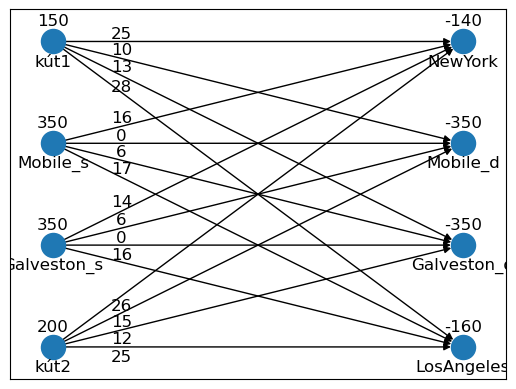

In [13]:
# Megoldás:
kinalat = ['kút1', 'kút2', 'Mobile_s', 'Galveston_s']
kereslet = ['Mobile_d', 'Galveston_d', 'NewYork', 'LosAngeles']

G = nx.DiGraph()

G.add_nodes_from([
    ('kút1', {"supply": 150}),
    ('kút2', {"supply": 200}),
    ('Mobile_s', {"supply": 350}),
    ('Galveston_s', {"supply": 350}),
    ('Mobile_d', {"supply": -350}),
    ('Galveston_d', {"supply": -350}),
    ('NewYork', {"supply": -140}),
    ('LosAngeles', {"supply": -160})
])
# A keresletet értelmezzük úgy, mint negatív kínálat

G.add_edge('kút1', 'Mobile_d', weight = 10)
G.add_edge('kút1', 'Galveston_d', weight = 13)
G.add_edge('kút1', 'NewYork', weight = 25)
G.add_edge('kút1', 'LosAngeles', weight = 28)
G.add_edge('kút2', 'Mobile_d', weight = 15)
G.add_edge('kút2', 'Galveston_d', weight = 12)
G.add_edge('kút2', 'NewYork', weight = 26)
G.add_edge('kút2', 'LosAngeles', weight = 25)
G.add_edge('Mobile_s', 'Mobile_d', weight = 0)
G.add_edge('Mobile_s', 'Galveston_d', weight = 6)
G.add_edge('Mobile_s', 'NewYork', weight = 16)
G.add_edge('Mobile_s', 'LosAngeles', weight = 17)
G.add_edge('Galveston_s', 'Mobile_d', weight = 6)
G.add_edge('Galveston_s', 'Galveston_d', weight = 0)
G.add_edge('Galveston_s', 'NewYork', weight = 14)
G.add_edge('Galveston_s', 'LosAngeles', weight = 16)

pos={'kút1':(-1,2), 'kút2':(-1,-1), 'Mobile_d':(2,1), 'Galveston_d':(2,0), 'Mobile_s':(-1,1), 'Galveston_s':(-1,0), 'NewYork':(2,2), 'LosAngeles':(2,-1)}
nx.draw_networkx(G, pos, with_labels=False)

pos2={'kút1':(-1,1.8), 'kút2':(-1,-1.2), 'Mobile_d':(2,0.8), 'Galveston_d':(2,-0.2), 'Mobile_s':(-1,0.8), 'Galveston_s':(-1,-0.2), 'NewYork':(2,1.8), 'LosAngeles':(2,-1.2)}
node_lab={}
for v in G.nodes():
    node_lab[v]=v
nx.draw_networkx_labels(G, pos2, node_lab)

pos3={'kút1':(-1,2.2), 'kút2':(-1,-0.8), 'Mobile_d':(2,1.2), 'Galveston_d':(2,0.2), 'Mobile_s':(-1,1.2), 'Galveston_s':(-1,0.2), 'NewYork':(2,2.2), 'LosAngeles':(2,-0.8)}
node_labels = nx.get_node_attributes(G, "supply")
nx.draw_networkx_labels(G, pos3, node_labels)

edge_labels = nx.get_edge_attributes(G, "weight")
pos4={('kút1', 'NewYork'): (-0.5,2.075), ('kút1', 'Mobile_d'): (-0.5,1.9125), ('kút1', 'Galveston_d'): (-0.5,1.75), ('kút1', 'LosAngeles'): (-0.5,1.55),
('Mobile_s', 'NewYork'): (-0.5,1.25), ('Mobile_s', 'Mobile_d'): (-0.5,1.075), ('Mobile_s', 'Galveston_d'): (-0.5,0.9125), ('Mobile_s', 'LosAngeles'): (-0.5,0.75),
('Galveston_s', 'NewYork'): (-0.5,0.425), ('Galveston_s', 'Mobile_d'): (-0.5,0.25), ('Galveston_s', 'Galveston_d'): (-0.5,0.075), ('Galveston_s', 'LosAngeles'): (-0.5,-0.1),
('kút2', 'NewYork'): (-0.5,-0.6), ('kút2', 'Mobile_d'): (-0.5,-0.75), ('kút2', 'Galveston_d'): (-0.5,-0.925), ('kút2', 'LosAngeles'): (-0.5,-1.1)}
nx.draw_networkx_labels(G, pos4, edge_labels)

G.add_node('fiktív', supply = -50)
kereslet.append('fiktív')
for i in kinalat:
    G.add_edge(i, 'fiktív', weight = 0)

In [14]:
# I. verzió: klasszikus szállítási feladat, ahol a köztes pontok mind keresleti, mind kínálati oldalon megjelennek

szallitasi = pulp.LpProblem('szallitasi_feladat', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

szallitasi += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

for i in kinalat:
    szallitasi += lpSum(x[i,j] for j in kereslet) == G.nodes[i]["supply"], "kinalat_" + str(i)
    
for j in kereslet:
    szallitasi += lpSum(x[i,j] for i in kinalat) == -G.nodes[j]["supply"], "kereslet_" + str(j)

megoldas = szallitasi.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális szállítás össz. költsége: z* = ', value(szallitasi.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális szállítás össz. költsége: z* =  7500.0
x('kút1', 'Mobile_d') = 0.0
x('kút1', 'Galveston_d') = 0.0
x('kút1', 'NewYork') = 140.0
x('kút1', 'LosAngeles') = 0.0
x('kút1', 'fiktív') = 10.0
x('kút2', 'Mobile_d') = 0.0
x('kút2', 'Galveston_d') = 0.0
x('kút2', 'NewYork') = 0.0
x('kút2', 'LosAngeles') = 160.0
x('kút2', 'fiktív') = 40.0
x('Mobile_s', 'Mobile_d') = 350.0
x('Mobile_s', 'Galveston_d') = 0.0
x('Mobile_s', 'NewYork') = 0.0
x('Mobile_s', 'LosAngeles') = 0.0
x('Mobile_s', 'fiktív') = 0.0
x('Galveston_s', 'Mobile_d') = 0.0
x('Galveston_s', 'Galveston_d') = 350.0
x('Galveston_s', 'NewYork') = 0.0
x('Galveston_s', 'LosAngeles') = 0.0
x('Galveston_s', 'fiktív') = 0.0


In [15]:
# II. verzió: átrakodásos szállítási feladat, mint folyam feladat
G.remove_node('Mobile_d')
G.remove_node('Mobile_s')
G.remove_node('Galveston_d')
G.remove_node('Galveston_s')
G.add_node('Mobile', supply=0)
G.add_node('Galveston', supply=0)
G.add_edge('kút1', 'Mobile', weight=10)
G.add_edge('kút1', 'Galveston', weight=13)
G.add_edge('kút2', 'Mobile', weight=15)
G.add_edge('kút2', 'Galveston', weight=12)
G.add_edge('Mobile', 'Galveston', weight=6)
G.add_edge('Galveston', 'Mobile', weight=6)
G.add_edge('Mobile', 'NewYork', weight=16)
G.add_edge('Mobile', 'LosAngeles', weight=17)
G.add_edge('Galveston', 'NewYork', weight=14)
G.add_edge('Galveston', 'LosAngeles', weight=16)
G.add_edge('Mobile', 'fiktív', weight=0)
G.add_edge('Galveston', 'fiktív', weight=0)

kereslet.remove('Mobile_d')
kereslet.remove('Galveston_d')
kinalat.remove('Mobile_s')
kinalat.remove('Galveston_s')

koztes = ['Mobile', 'Galveston']

min_ktg_folyam = pulp.LpProblem('minimális_költségű_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

min_ktg_folyam += lpSum(G[i][j]['weight']*x[i,j] for i,j in G.edges())

#Kapacitáskorlátok
for i in kinalat:
    for j in kereslet:
        min_ktg_folyam += x[i,j] <= min(G.nodes[i]["supply"],-G.nodes[j]["supply"])
        
# kínálati oldalról köztes pontba, köztes pontból a keresleti pontba megengedhető a 'végtelen' kapacitás
# ha egyszer a folyammegmaradás a köztes pontokban úgyis teljesül

# Nettó folyammegmaradási feltételek (minden csúcsra)
for v in G.nodes():
    min_ktg_folyam += lpSum(x[i,j] for i,j in G.out_edges(v))+lpSum(-x[i,j] for i,j in G.in_edges(v)) == G.nodes[v]["supply"]
    
megoldas = min_ktg_folyam.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Folyan minimális költsége: z* = ', value(min_ktg_folyam.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Folyan minimális költsége: z* =  7500.0
x('kút1', 'NewYork') = 140.0
x('kút1', 'LosAngeles') = 0.0
x('kút1', 'fiktív') = 10.0
x('kút1', 'Mobile') = 0.0
x('kút1', 'Galveston') = 0.0
x('kút2', 'NewYork') = 0.0
x('kút2', 'LosAngeles') = 160.0
x('kút2', 'fiktív') = 40.0
x('kút2', 'Mobile') = 0.0
x('kút2', 'Galveston') = 0.0
x('Mobile', 'Galveston') = 0.0
x('Mobile', 'NewYork') = 0.0
x('Mobile', 'LosAngeles') = 0.0
x('Mobile', 'fiktív') = 0.0
x('Galveston', 'Mobile') = 0.0
x('Galveston', 'NewYork') = 0.0
x('Galveston', 'LosAngeles') = 0.0
x('Galveston', 'fiktív') = 0.0
